# Similarity Modeling 1/2: Summary of approaches and results

## 1. Approaches Matthias Hofmaier (11944050)

### 1.1 Recognizing Kermit the Frog in Video with Feature Engineering and Machine Learning
See [video-based-feature-engineering.ipynb](video-based-feature-engineering.ipynb).

Within this notebook, we gained an overview over the ground truth data, extracted frames from the videos, performed a train/validation/test split. After that we performed feature extraction from the video frames. This involved the following steps:

1. Conversion of the video frame to HSV color space.
2. Thresholding the frame based on a range of greens, corresponding to the color of Kermit.  
3. Detect contours (shapes) in the green thresholded frame.
4. Calculation of areas of the detected contours. Our hypothesis is that we will find larger contours for frames where Kermit is present than for frames where he is not.
5. Calculation of statistics of the contour areas. If no contours were found, we will create an array of zeros.
6. Calculation of Hu Moments of the thresholded image. Hu Moments are 7 numbers calculated using central moments (weighted averages of pixel intensities) that are invariant to image translations and describe the shape present in an image.    
7. Extraction of bounding boxes from the 3 largest contours found in the image. 
8. Merging of the bounding boxes into 1 large bounding box. 
9. Using found bounding box to crop region of interest from the original frame.
10. Conversion of cropped image to HSV color space.
11. Calculation of histogram for each color channel separately. Concatenation of color channel histograms.

**Example with Kermit present:**

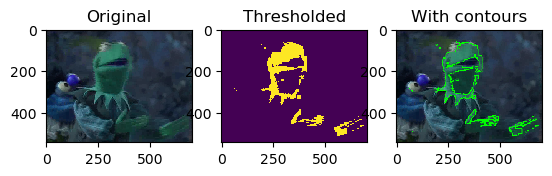
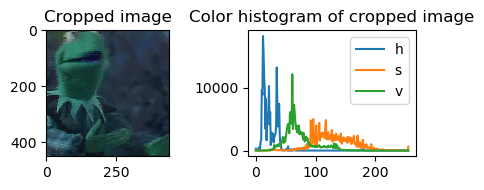

**Example with Kermit not present:**

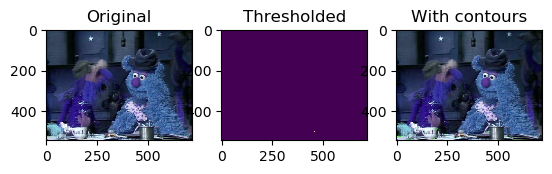
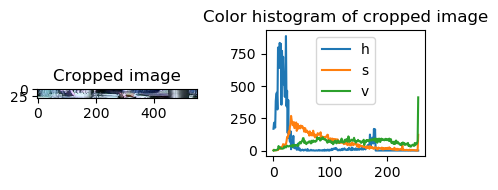

After that, we trained a Support Vector Machine and a Random Forest and performed a hyperparameter search. We then trained a RandomForest with the best found parameters and used a PR-curve for estimating the perfect cutoff-threshold (We could have also used the ROC-curve, but as this lead to volatility when using a different split for the deep learning approach, we wanted to stay consistent). After that we created the ROC-curve shown below:

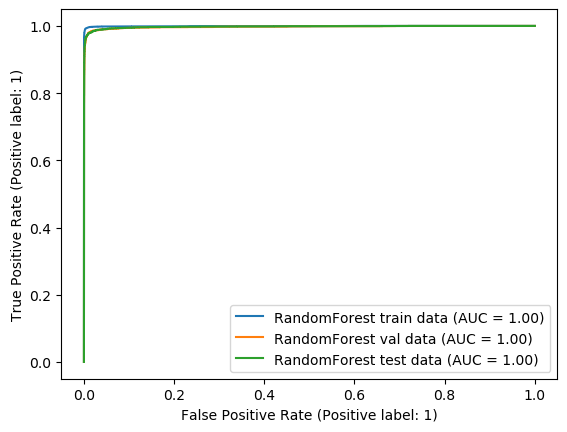

We can see that the model shows a perfect AUC for all dataset splits. After that, we discretized the predictions and calculated further metrics:

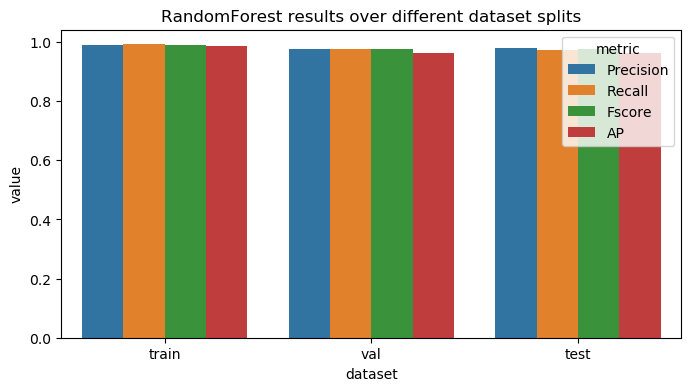

As we can observe above, the model obtains a near perfect recognition rate across all data set splits. One thing we have to note is that due to the way we split our dataset into train, validation and test, there is the possibility that frames that are directly following each other (i.e., are only very slightly different) can be in all of the dataset splits. To test how robust the classifiers perform in the wild, it would be better to use a video aware split, i.e., use one of the videos for training, one of the videos for validation and one of the videos for testing, or to use a completely new video for final evaluation and keep the current split. 

### 1.2 Recognizing Swedish Chef in Audio with Deep Learning  
See [audio-based-deep-learning.ipynb](audio-based-deep-learning.ipynb).

Within this notebook, we gained an over the ground truth data, extracted the audio from the videos and created mel spectrograms from the audio, and performed a train/val/test split. After that, we first of all used very small spectrogram snippets, representing exactly 1 video frame (which corresponds to 4 spectrogram frames in our setting). Followed by that, we assembled and trained a very simple CNN. The results of the training can be found in the following plot:

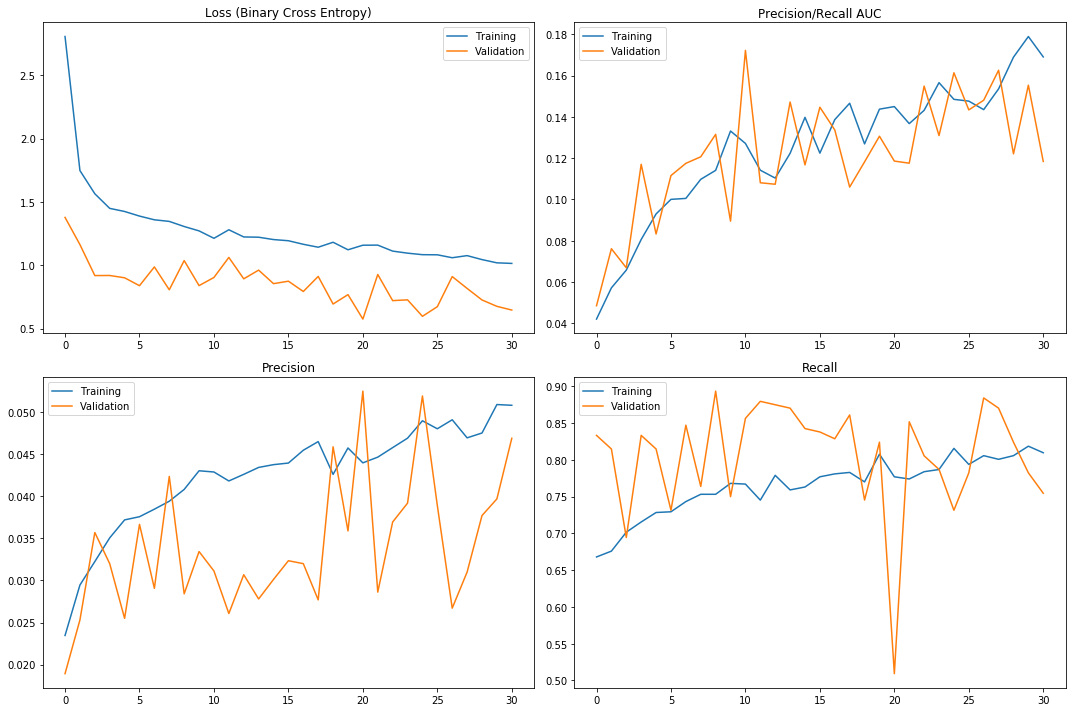

We can see that the Recall was already high, but the Precision was still very low (i.e., the model was too easy in saying that there is the Sweidsh Chef speaking). This was not satisfactory for us and because we were not able to create a more complex network because of the small spectrogram snippet size, we decided to use bigger snippets. Concretely, we used a context window of 4 video frames (16 spectrogram frames) before and after the video frame of our interest. This lead to a snippet size of 36 spectrogram frames in total. With this approach, we were able to obtain near perfect recognition rates. The results of the training are shown in the plots below:

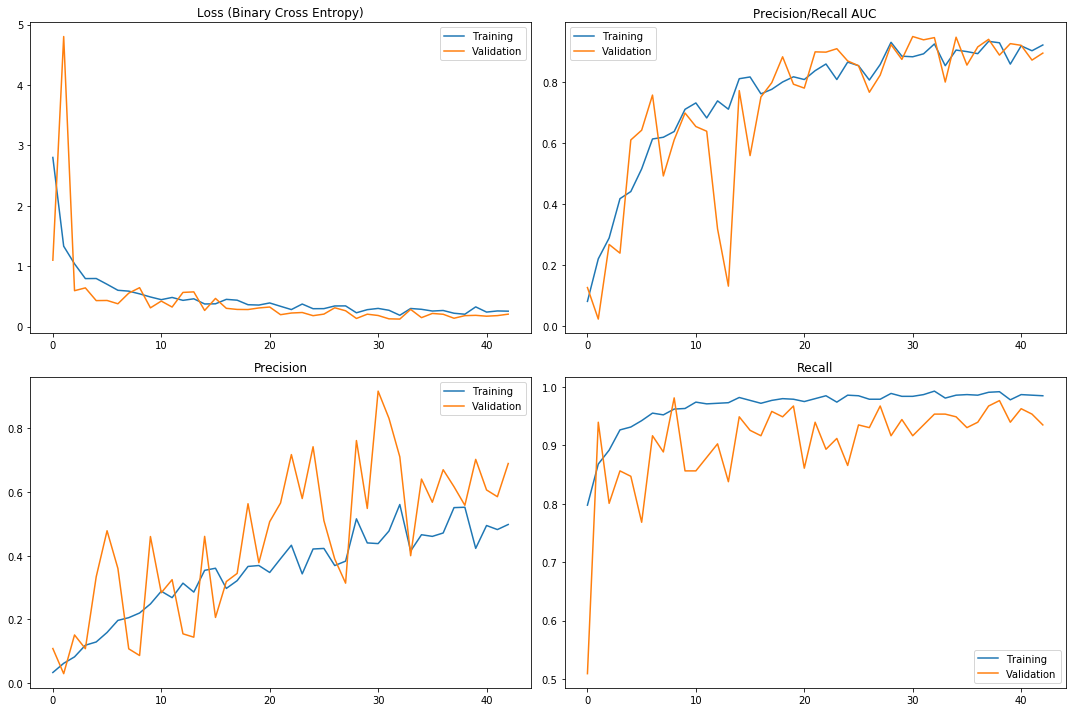

We can see that the Recall is still quite volatile over the training process. We selected the model with the highest PRAUC on the validation set, for further evalution and estimated the perfect cutoff threshold with the help of the PR-curve (we also tried to use the ROC curve for that, but as this led to very different results, depending on the dataset split, we decided to stick to the PR-curve method). The resulting ROC curve (of course before discretizing the predictions) can be found below: 

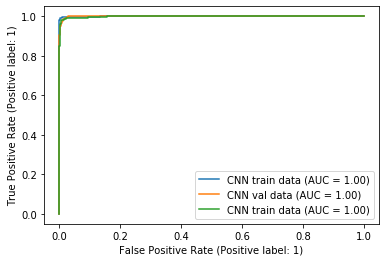

We can see that the model scores a perfect AUC for all dataset splits. This seems almost too good to be true, but after repeatly checking the evaluation, we accept those results as valid. We now discretized the predictions and calculated further metrics, which are shown in the following plot (**NOTE:** This plot shows the correct metric values for the CNN, but contains a typo in the title.):

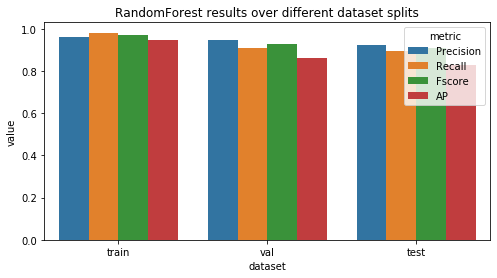

The metrics above also look almost perfect over all dataset splits. The metrics are only slightly lower for validation and testing compared to the training set. This is an indicator that the model is only slightly overfitting. As already mentioned for the video-based feature engineering approach, we have to keep in mind, that spectrogram snippets that are followed by each other (i.e., are very similar), can be in all of the 3 splits. To be really sure how good the model performs in the wild, video aware splitting or a new video solely for testing should be used.


## 2. Approaches Gallus Huber (51905700)

### 2.1 Recognizing Waldorf and Statler in Audio with Feature Engineering and Machine Learning
See [audio-based-feature-engineering.ipynb](audio-based-feature-engineering.ipynb).

Within this notebook, we gained an overview of the ground truth, extracted the audio from the videos, created mel spectrograms from the audio, and performed a train/val/test split. After that we performed a feature extraction.
Then, we trained a Random Forest and a Support Vector Machine. We performed a hyperparameter search for the Random Forest and created a classifier with the parameters found. Afterwards we used a PR-curve for estimating the perfect cutoff-threshold. After that we created the ROC-curves.

![](../plots/roc_audio_ws.png)

Finally, we calculated metrics for all of our sets and visualized the results.

![](../plots/results_audio_ws.png)

Please keep in mind that the real performance of the model could only be tested on a fourth independent video.

### 2.2 Recognizing Pigs in Video with Deep Learning
See [video-based-deep-learning.ipynb](video-based-deep-learning.ipynb).

Within this notebook, we gained an overview over the ground truth data, extracted frames from the videos, performed a train/validation/test split. We then created a CNN based on a pretrained model and trained it on our dataset.

![](../plots/training_video_pigs.png)

We selected the model with the highest PRAUC on the validation set, for further evaluation and estimated the perfect cutoff threshold with the help of the PR-curve. After that we created the ROC-curves.

![](../plots/roc_video_pigs.png)

Finally, we calculated metrics for all of our sets and visualized the results.

![](../plots/results_video_pigs.png)

Please keep in mind that the real performance of the model could only be tested on a fourth independent video.

Additional data: https://drive.google.com/drive/folders/1zo2yCIfjDBhYl97WxL52KF0peN-2iqai?usp=sharing